# Лабораторная работа № 3. Статистический анализ данных и построение графиков

В работе проводится обзор основных возможностей модулей **numpy** и **pandas** для статистического анализа данных, а также их визуализации с помощью модуля **matplotlib**. 

## Цель работы

Изучить основные возможности модулей **matplotlib** и **pandas** по визуальному представлению данных. Получить навык статистической обработки данных средствами модуля **pandas**.

## Модуль matplotlib

Модуль **matplotlib** является довольно мощным средством пострения различного рода графиков. Подчас работа с ним вызывает некоторые затруднения, которые вызваны некоторыми аспектами. Этот модуль действительно обширен, **matplotlib** содержит несколько разных интерфейсов (способов построения фигуры) и может взаимодействовать с большим количеством бекендов (бекенды отвечают за то, как по факту будут отображаться диаграммы, не только за внутреннюю структуру). К тому же часть собственной документации **matplotlib** серьезно устарела. Однако понимание того, как работает этот модуль позволит избежать большинства возникающих затруднений.

Всю документацию по этому модулю и примеры его использования можно найти на [официальном сайте.](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib.org")

Импортируем модуль с помощью команды **import**. Стандартное краткое обозначение - **plt**

In [1]:
import matplotlib.pyplot as plt
print(plt)

<module 'matplotlib.pyplot' from 'c:\\Users\\ilya5\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>


Следующая магическая команда (она именно так называется!) устанавливает определенный бекенд: *inline* означает, что графики будут строится непосредственно после самого кода, т.е. будут включаться в структуру кода, а *notebook* означает, что графики будут рисоваться отдельно от того кода, который их вызвал. Это может быть полезно, например, для динамического обновления графика.

In [2]:
%matplotlib notebook 
%matplotlib inline

**Matplotlib** основывается на иерархии объектов. Объект **Figure** – это внешний контейнер для графики, который может включать в себя несколько объектов **Axes**. Причиной сложности в понимании может быть название: **Axes** (оси), на самом деле, представляют собой то, что мы подразумеваем под индивидуальным графиком или диаграммой.

Можно рассматривать объект **Figure** как контейнер, содержащий один или несколько объектов **Axes** (настоящих графиков). Под объектами **Axes**, в порядке иерархии расположены меньшие объекты, такие как индивидуальные линии, отметки, легенды и текстовые боксы. Практически каждый «элемент» диаграммы – это собственный манипулируемый объект Python, вплоть до ярлыков и отметок.

![Figure object](https://python-scripts.com/wp-content/uploads/2018/03/figure-matplotlib.jpg "Figure object")

Для создания объекта **Figure** используется функция **subplots(figsize)**, на вход которой подается размер окна в виде объекта **tuple**. Возвращаемое значение - объект **Figure** и объекты **Axes**, находящиеся внутри объекта **Figure**.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


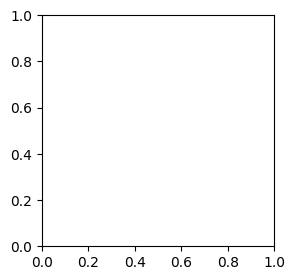

In [3]:
fig, ax = plt.subplots(figsize=(3,3))
print(type(fig))
print(type(ax))

Важно отметить, что есть два интерфейса работы с модулем **matplotlib**: структурированный (ориентированный на структуру) и неструктурированный (ориентированный на объект). Пример выше - структурированный подход. В этом подходе все команды стоит приписывать определенному объекту **Axes**, вызвать который можно с помощью команды **gca()** (get current axes). Пример ниже иллюстрирует, каким образом в рамках структурированного подхода можно построить простой график.

Обратите внимание, что график построился в окошке выше, к которому привязался объект **Axes**.

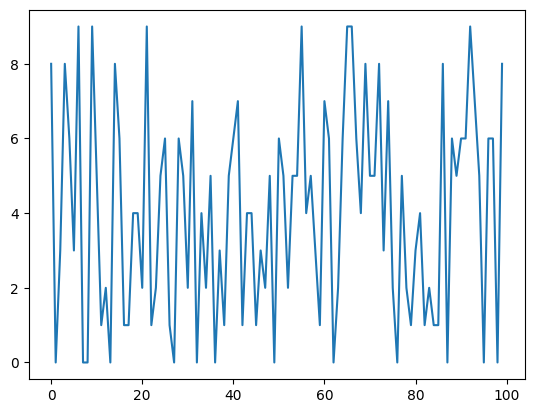

In [4]:
import numpy as np

ax = plt.gca()
ax.plot(np.arange(100), np.random.randint(0, 10, size=100))

Другим подходом является неструктурированный подход. Он проще в использовании, и дальнейшем мы будем пользоваться им. В рамках этого подхода текущий объект **Axes** всегда негласно подразумевается. При функции, которая создает новый объект **Axes**, фокус внимания смещается на него. Пример ниже иллюстрирует построение простого графика в рамках неструктурированного (объектно-ориентированного) подхода.

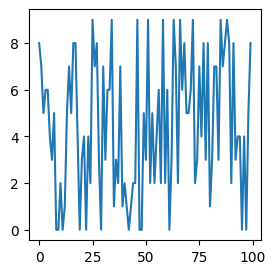

In [5]:
plt.figure(figsize = (3,3))
plt.plot(np.arange(100), np.random.randint(0, 10, size=100))
plt.show()

### Линейный график

Построить линейный график можно с помощью метода **plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='line1')**. Здесь *x* - массив значений по горизонтальной оси, *y* - массив значений по вертикальной оси, *color* - цвет линии, *marker* - отображение точек ('0' - круги, 'x' - кресты и др.), *linestyle* - тип рисуемой линии (сплошная, штриховая, точечная и др.), *linewidth* - ширина линии, *markersize* - размер точек, *label* - название линии. Есть еще много других параметров, о них можно прочитать в документации.

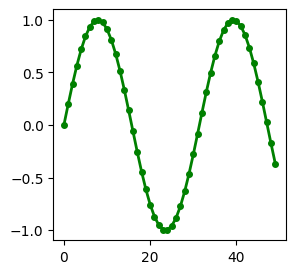

In [6]:
plt.figure(figsize = (3,3))
x = np.arange(50)
y = np.sin(x / 5)
plt.plot(x, y, color='green', marker='o', linestyle='solid', linewidth=2, markersize=4, label='line1')
plt.show()

Вызов еще одной такой же функции добавляет новую кривую на тот же график. Если параметры прорисовки линий не указывать, то они устанавливаются по умолчанию.

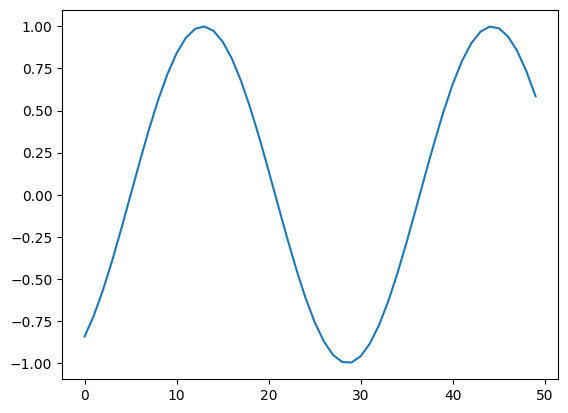

In [7]:
y = np.sin(x / 5 - 1)
plt.plot(x, y)

Функция **title()** устанавливает название графика, функции **xlabel()**, **ylabel()** устанавливают названия осей, функции **xlim()**, **ylim()** - диапазоны осей, **xscale()**, **yscale()** - масштабы осей (линейный, логарифмический). Функция **legend()** размещает легенду к графику в определенном место (за это отвечает параметр *loc*).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


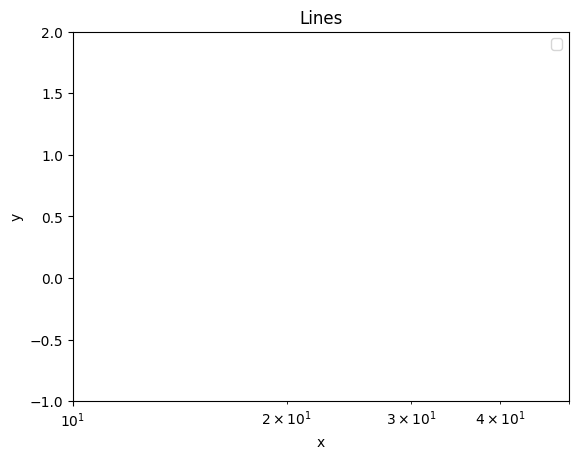

In [8]:
plt.title('Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(10, 50)
plt.ylim(-1, 2)
plt.xscale('log')
plt.legend(loc='best')

### Точечный график

Для построения точечного графика используется функция **plt.scatter(x, y, s=3, c='green', marker='+', cmap, alpha=0.5, label='scatter')**. Аргументы этой функции схожи с аргументами функции **plt.plot()**, но есть отличия. Параметр *s* задает размер маркера, *c* задает цвет, *cmap* обозначает цветовую палитру, в которую в зависимости от значения будут раскрашены точки, *alpha* задает степень прозрачности маркера (1 - непрозрачный, 0 - прозрачный).

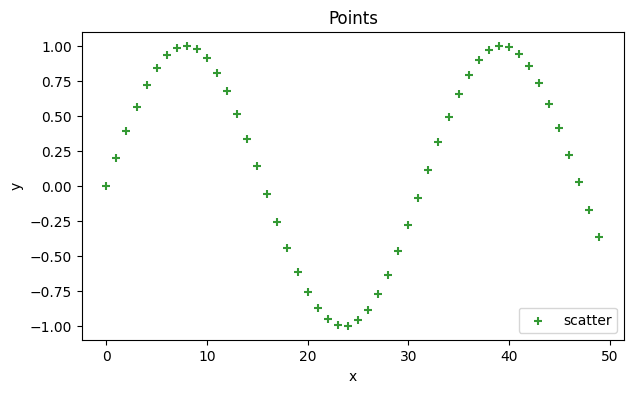

In [9]:
plt.figure(figsize = (7,4))
x = np.arange(50)
y = np.sin(x / 5)
plt.scatter(x, y, s=30, c='green', marker='+', alpha=0.8, label='scatter')
plt.title('Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

### Несколько графиков в одном окне

Предположим, нам надо сравнить несколько различных графиков друг с другом, т.е. расположить их рядом или сгруппировать несколько графиков, чтобы они отображались в одном окне. В этом случае объекту **Figure** будут принадлежать сразу несколько объектов **Axes**. Построить такие графики можно с помощью функции **plt.subplot(nrows, ncol, num)**, *nrows* равен числу колонок в таблице из графиков, *ncol* равен числу столбцов в таблице из графиков, *num* обозначает порядковый номер графика. При этом после выполнения команды **plt.subplot()** "фокус" смещается на текущий график, и все команды, связанные с отображением данных, построения самого графика, оформления его внешнего вида, исполняются для текущего объекта **Axes**. Новая команда **plt.subplot()** с другим *num* делает активным уже другой объект **Axes**.

В примере ниже построим две кривые на соседних графиках.

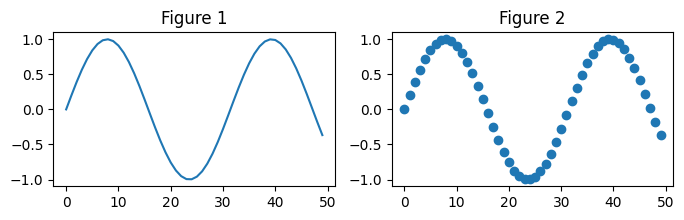

In [10]:
plt.figure(figsize = (8,2))
plt.subplot(1,2,1)
plt.title('Figure 1')
plt.plot(x, y)
plt.subplot(1,2,2)
plt.title('Figure 2')
plt.scatter(x, y)
plt.show()

### Гистограммы

Гистограммы строятся с помощью функции **plt.hist(x, bins, range=(xmin, xmax), histtype, align, orientation, color, label)**. Аргумент *x* содержит последовательность значений, по которым будет строится гистограмма, *range* определяет, в каких интервалах будут выбираться значения, *bins* равен числу столбцов в гистограмме, *color* задает цвета, *label* определеяет метки данных (названия колонок). 

Параметр *histtype* определяет тип гистограммы: *bar* - традиционная гистограмма в виде колонок/столбцов (если данные многомерные, то каждая колонка будет содержать колонки под каждую размерность), *barstacked* - в случае многомерных данных колонки будут друг над другом, *step* - отображается огибающая, *stepfilled* - отображается огибающая с заполнением.

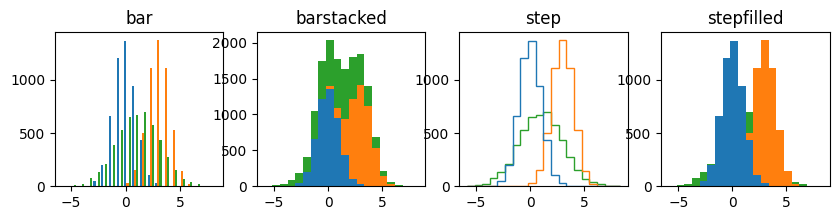

In [11]:
x1 = np.random.normal(loc=0, scale=1, size=5000)
x2 = np.random.normal(loc=3, scale=1, size=5000)
x3 = np.random.normal(loc=1, scale=2, size=5000)

plt.figure(figsize = (10,2))
plt.subplot(1,4,1)
plt.title('bar')
plt.hist([x1,x2,x3], bins=20, histtype='bar', align='mid', orientation='vertical')
plt.subplot(1,4,2)
plt.title('barstacked')
plt.hist([x1,x2,x3], bins=20, histtype='barstacked', align='mid', orientation='vertical')
plt.subplot(1,4,3)
plt.title('step')
plt.hist([x1,x2,x3], bins=20, histtype='step', align='mid', orientation='vertical')
plt.subplot(1,4,4)
plt.title('stepfilled')
plt.hist([x1,x2,x3], bins=20, histtype='stepfilled', align='mid', orientation='vertical')
plt.show()

Параметр *align* определяет выравнивание баров относительно колонок. Возможные значения: *left*, *mid*, *right*.

Параметр *orientation* принимает возможные значения *horizontal* и *vertical* и определяет пространственную ориентацию колонок.

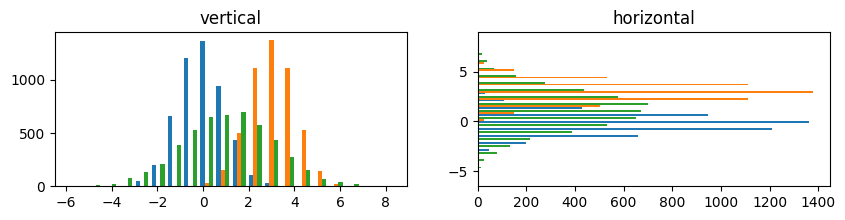

In [12]:
plt.figure(figsize = (10,2))
plt.subplot(1,2,1)
plt.title('vertical')
plt.hist([x1,x2,x3], bins=20, orientation='vertical')
plt.subplot(1,2,2)
plt.title('horizontal')
plt.hist([x1,x2,x3], bins=20, orientation='horizontal')
plt.show()

## Статистический анализ средствами модуля **pandas**

В первой лабораторной работе уже упоминался метод **describe()** классов **Series** и **DataFrame**, позволяющий получать основные статистические величины (среднее значение, стандартное отклонение, медиану и пр.) по каждой из колонок таблицы. Но иногда требуется получить какие-то другие статистические величины, только на части данных, удовлетворяющих определенному условию. Для этого можно использовать непосредственно статистические функции, являющиеся методами этих классов: *max()*, *min()*, *mode()*, *kurt()*, *median()*, *quantile()*, *skew()*, *std()*, *var()*, *diff()*, *corr()*, *autocorr()* и др. Полный список можно найти на [сайте с документацией](https://pandas.pydata.org/docs/reference/frame.html "dataframe").

Для примера создадим объект **DataFrame** c 10 колонками и заполним их равномерно распределенными значениями в интервале \[0, 1\].

In [13]:
import pandas as pd

df = pd.DataFrame(data=np.array([np.random.uniform(size=1000) for i in range(10)]).T, columns=['Var'+str(i) for i in range(10)])
df.head()

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9
0,0.787173,0.196282,0.202538,0.461708,0.086628,0.764169,0.492813,0.772913,0.637532,0.301070
1,0.560341,0.827170,0.838379,0.906829,0.356186,0.998341,0.029055,0.557267,0.838658,0.412570
2,0.016873,0.027652,0.699758,0.350881,0.172611,0.688890,0.877540,0.753349,0.086503,0.749977
3,0.515777,0.999156,0.633791,0.179796,0.040696,0.538634,0.904232,0.994818,0.651943,0.197251
4,0.766611,0.124418,0.694885,0.226987,0.530754,0.585075,0.604066,0.277833,0.167367,0.935150


**DataFrame** имеет встроенные методы для построения графиков. Например, построим точечный график для значений первой колонки по значениям нулевой колонки с помощью метода **plot.scatter()**. Его аргументы аналогичны функции **plt.scatter()**.

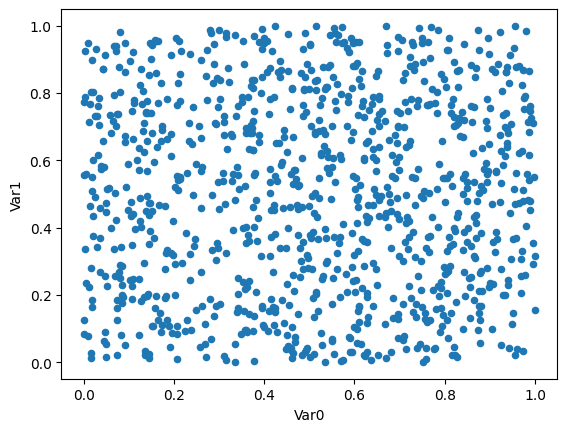

In [14]:
df.plot.scatter('Var0', 'Var1')
plt.show()

С помощью метода **plot.hist()** определим распределение величины *Var3*, а также вычислим среднее и медиану.

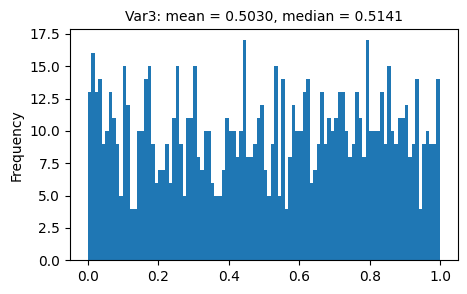

In [15]:
mean_value = df['Var3'].mean()
median_value = df['Var3'].median()

plt.figure(figsize=(5,3))
df['Var3'].plot.hist(bins=100)
plt.title('Var3: mean = {:.4f}, median = {:.4f}'.format(mean_value, median_value), size=10)
plt.show()

Есть особый тип графиков - *boxplot*, который позволяет наглядно увидеть основные перцентили распределения. Построим такие графики для всех колонок из *df*. 

Средняя линия показывает медиану (50-й перцентиль), верхняя и нижняя границы прямоугольника - 25-й и 75-й перцентиль, верхний и нижний диапазоны - минимальное и максимальное значения соответственно.

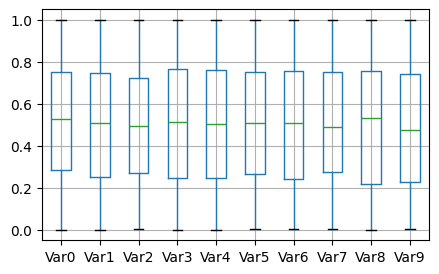

In [16]:
plt.figure(figsize=(5,3))
df.boxplot(column = list(df.columns))
plt.show()

Модуль **matplotlib** позволяет также построить двумерный график двумерной таблицы с помощью функции **matshow()**, при этом значения в таблице будут задавать цвет на двумерном графике. Например, рассчитаем попарную корреляцию Пирсона для всех колонок *df.corr()* и построим двумерный график. 

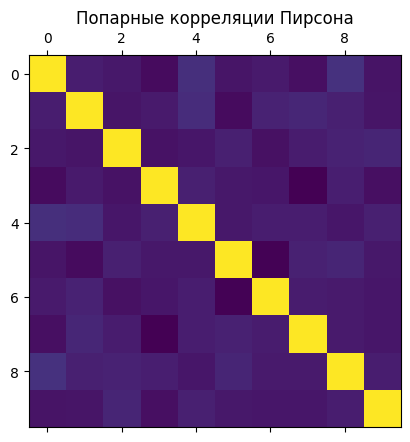

In [17]:
plt.matshow(df.corr())
plt.title('Попарные корреляции Пирсона')
plt.show()

## Задания для самостоятельной работы

1. Постройте на одном графике 4 зависимости: кубическую параболу, корень квадратный, логарифм и сигмоиду. Оформите график таким образом, чтобы разные зависимости визуально четко отличались друг от друга (изменяйте цвет, толщину линии, масштаб графика). Подпишите оси, добавьте легенду.

C:\Users\ilya5\AppData\Local\Temp\ipykernel_11496\3080545093.py:8: RuntimeWarning: invalid value encountered in sqrt
  y2 = np.sqrt(x)             # Корень квадратный
C:\Users\ilya5\AppData\Local\Temp\ipykernel_11496\3080545093.py:9: RuntimeWarning: invalid value encountered in log
  y3 = np.log(x)              # Логарифм


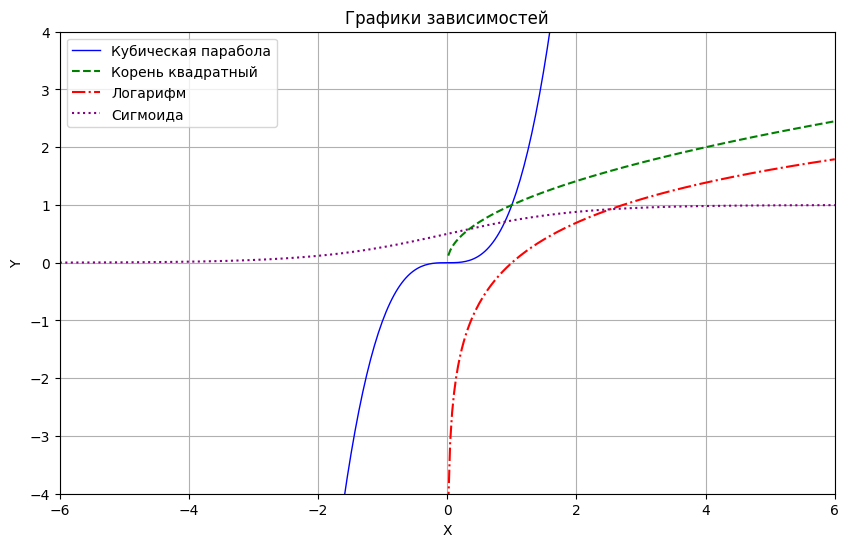

In [18]:
import numpy as np
import matplotlib.pyplot as plt

minX, maxX = -6, 6
x = np.linspace(minX, maxX, 400)

y1 = x**3                   # Кубическая парабола
y2 = np.sqrt(x)             # Корень квадратный
y3 = np.log(x)              # Логарифм
y4 = 1 / (1 + np.exp(-x))   # Сигмоида


plt.figure(figsize=(10, 6))

plt.plot(x, y1, label='Кубическая парабола', color='blue', linewidth=1)
plt.plot(x, y2, label='Корень квадратный', color='green', linestyle='--')
plt.plot(x, y3, label='Логарифм', color='red', linestyle='-.')
plt.plot(x, y4, label='Сигмоида', color='purple', linestyle=':')

plt.title('Графики зависимостей')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.xlim(minX, maxX)
plt.ylim(-4, 4)
plt.grid(True)

plt.show()


2. Создайте таблицу, состоящую из 50 колонок и 1000 строк. Каждая колонка должна иметь нормальное распределение с различными средними значениями и стандартными отклонениями.

In [19]:
import numpy as np
import pandas as pd

np.random.seed(42)
num_rows = 1000
num_cols = 50
data = {}

for i in range(num_cols):
    mean = np.random.uniform(0, 100)  # Случайное среднее значение от 0 до 100
    std_dev = np.random.uniform(1, 10)  # Случайное стандартное отклонение от 1 до 10
    column_data = np.random.normal(mean, std_dev, num_rows)
    column_name = f'Column_{i+1}'
    data[column_name] = column_data

df = pd.DataFrame(data)
df.head()


,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_41,Column_42,Column_43,Column_44,Column_45,Column_46,Column_47,Column_48,Column_49,Column_50
0,43.643601,3.720685,31.096750,25.823906,45.975652,44.420500,98.108526,70.758839,76.074222,4.063886,...,77.601008,74.693694,84.648177,91.050601,25.254561,72.698458,89.236164,29.927572,30.777533,83.631068
1,52.008738,-2.939353,35.308424,12.554870,51.429262,42.986907,102.529758,76.464615,76.039492,5.888365,...,90.259019,78.383014,91.655006,98.899113,29.359779,81.700691,87.952022,20.414608,36.617450,82.233314
2,35.216342,9.740005,34.884463,29.717515,48.459848,41.785418,99.489370,72.948548,89.640320,6.908858,...,77.431087,77.096787,91.509520,99.605676,18.551562,73.471454,96.762719,33.937203,32.625232,85.109571
3,35.216499,6.867572,33.248707,19.577729,41.515475,41.376833,92.865138,66.403983,84.206379,8.534029,...,64.912509,70.414777,89.376793,99.553697,28.035761,78.722170,87.800644,35.128167,33.429308,77.913398
4,52.545647,11.596625,36.199874,22.041118,43.560432,41.897857,107.889105,83.543087,68.220553,7.632547,...,75.556507,73.017791,93.160041,90.554332,21.972728,92.896995,97.347857,18.518279,30.575534,88.774421


3. Определите медианы и стандартные отклонения для всех колонок.

In [20]:
medians = df.median()
std_deviations = df.std()

result_df = pd.DataFrame({
    'Медиана': medians,
    'Стандартное отклонение': std_deviations
})

result_df

,Медиана,Стандартное отклонение
Column_1,37.707147,9.369852
Column_2,3.708350,9.392920
Column_3,34.882788,1.972923
Column_4,22.677813,6.680543
Column_5,48.261110,4.816844
Column_6,41.696576,1.670254
Column_7,96.917803,5.080213
Column_8,73.139106,8.293274
Column_9,79.649089,4.833775
Column_10,7.284485,1.814705


4. Постройте 2 отдельных точечных графика в одном окне: один для медиан, второй для стандартных отклонений. Оформите график так, чтобы он выглядел аккуратно и красиво (выберите подходящий масштаб, размер шрифта, подпишите оси, добавьте названия графиков).

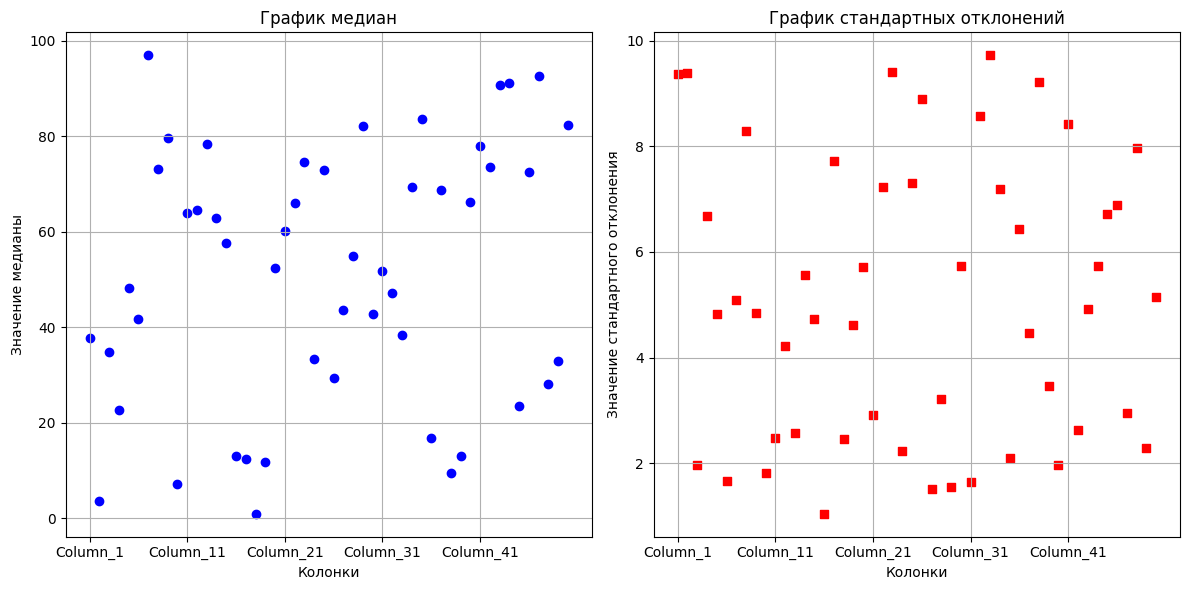

In [21]:
plt.figure(figsize=(12, 6))

# График для медиан
plt.subplot(1, 2, 1)
plt.scatter(result_df.index, result_df['Медиана'], color='blue', marker='o')
plt.title('График медиан')
plt.xlabel('Колонки')
plt.ylabel('Значение медианы')
plt.xticks(result_df.index[::10])
plt.grid(True)

# График для стандартных отклонений
plt.subplot(1, 2, 2)
plt.scatter(result_df.index, result_df['Стандартное отклонение'], color='red', marker='s')
plt.title('График стандартных отклонений')
plt.xlabel('Колонки')
plt.ylabel('Значение стандартного отклонения')
plt.xticks(result_df.index[::10])
plt.grid(True)

plt.tight_layout()
plt.show()

5. Постройте boxplot для любых 10 колонок.

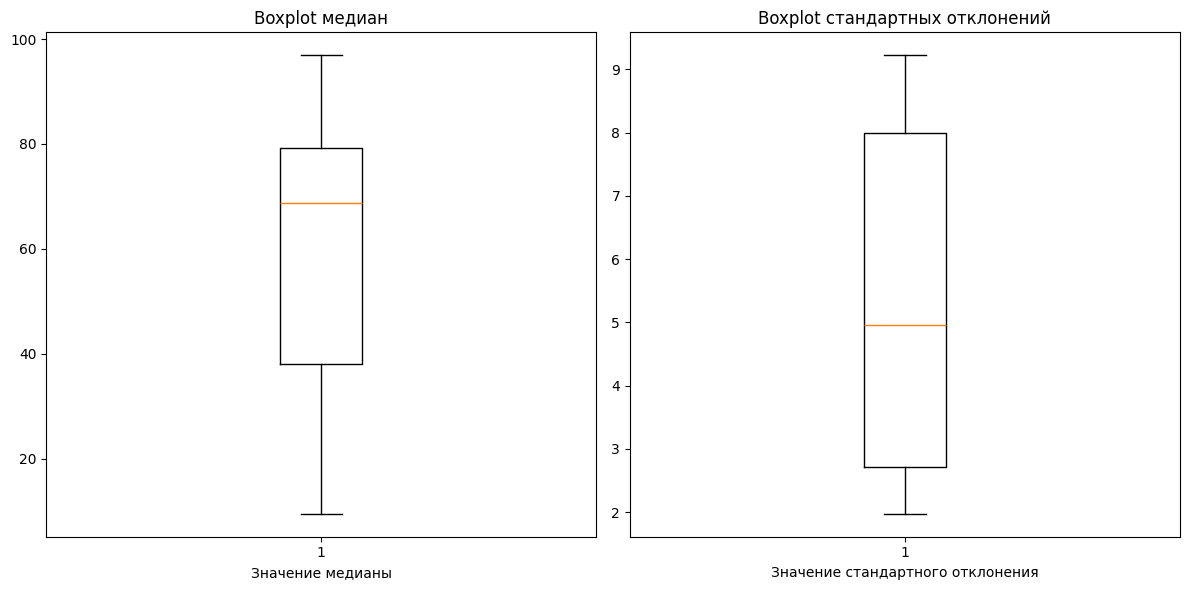

In [22]:
sample_rows = result_df.sample(10)
sample_rows

plt.figure(figsize=(12, 6))

# Boxplot для медиан
plt.subplot(1, 2, 1)
plt.boxplot(sample_rows['Медиана'])
plt.title('Boxplot медиан')
plt.xlabel('Значение медианы')

# Boxplot для стандартных отклонений
plt.subplot(1, 2, 2)
plt.boxplot(sample_rows['Стандартное отклонение'])
plt.title('Boxplot стандартных отклонений')
plt.xlabel('Значение стандартного отклонения')

plt.tight_layout()
plt.show()

6. Создайте другую таблицу, состоящую из 1000 колонок и 1000 строк. Каждая колонка должна иметь равномерное распределение в интервале от 0 до 1.

In [23]:
np.random.seed(425)
data = np.random.uniform(0, 1, size=(1000, 1000))

df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.758054,0.269384,0.818002,0.378096,0.592593,0.757000,0.483202,0.562558,0.374108,0.996757,...,0.145370,0.671902,0.873610,0.167855,0.338430,0.410044,0.696990,0.228936,0.159735,0.475266
1,0.293916,0.871610,0.536921,0.825564,0.497492,0.884593,0.884994,0.925085,0.004681,0.621612,...,0.475624,0.035838,0.639712,0.928292,0.570609,0.776137,0.553482,0.941331,0.784430,0.200497
2,0.075759,0.282389,0.695745,0.074945,0.773298,0.452727,0.417847,0.949369,0.107752,0.351989,...,0.720603,0.124623,0.595269,0.330994,0.361676,0.937463,0.550679,0.315629,0.881563,0.779310
3,0.147855,0.193537,0.031354,0.243083,0.244046,0.803181,0.966544,0.001868,0.769546,0.697969,...,0.081022,0.766765,0.432050,0.282991,0.651903,0.785419,0.846288,0.196169,0.032475,0.236114
4,0.812298,0.524287,0.160055,0.553238,0.457928,0.239354,0.764310,0.858780,0.298198,0.234780,...,0.610265,0.845285,0.033041,0.324169,0.735341,0.770108,0.734548,0.654456,0.612195,0.343741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.622023,0.177092,0.832202,0.192704,0.858356,0.618988,0.217394,0.918343,0.538549,0.881408,...,0.446718,0.461861,0.862416,0.455264,0.469825,0.000479,0.591690,0.745221,0.931188,0.995377
996,0.554474,0.448197,0.821227,0.348551,0.685499,0.363343,0.936273,0.683006,0.112451,0.952903,...,0.967655,0.120903,0.493037,0.561549,0.832219,0.463103,0.427430,0.111530,0.068693,0.841695
997,0.691601,0.951638,0.998262,0.764166,0.611152,0.266798,0.515631,0.847047,0.681985,0.397026,...,0.354961,0.570666,0.080993,0.131470,0.272983,0.955780,0.335817,0.676969,0.983172,0.157766
998,0.391619,0.356001,0.507353,0.302687,0.304974,0.683664,0.626868,0.787472,0.062361,0.605668,...,0.872834,0.480564,0.457530,0.366256,0.689044,0.967544,0.073267,0.310280,0.352456,0.946482


7. Рассчитайте попарную корреляцию Пирсона всех колонок. Определите 4 пары колонок, имеющих наибольшую попарную корреляцию.

In [24]:
correlation_matrix = df.corr()

top_corr_pairs = (correlation_matrix
                  .stack()
                  .sort_values(ascending=False)
                  .reset_index()
                  .rename(columns={0: 'Корреляция'})
                  .query('level_0 != level_1')
                  .head(4))

print("Четыре пары колонок с наибольшей корреляцией:")
top_corr_pairs

Четыре пары колонок с наибольшей корреляцией:


,level_0,level_1,Корреляция
1000,744,392,0.151352
1001,392,744,0.151352
1002,182,161,0.139762
1003,161,182,0.139762


8. Постройте линейные графики этих пар в одном окне, так чтобы на каждом графике отображалась одна пара (каждая кривая своим цветом).

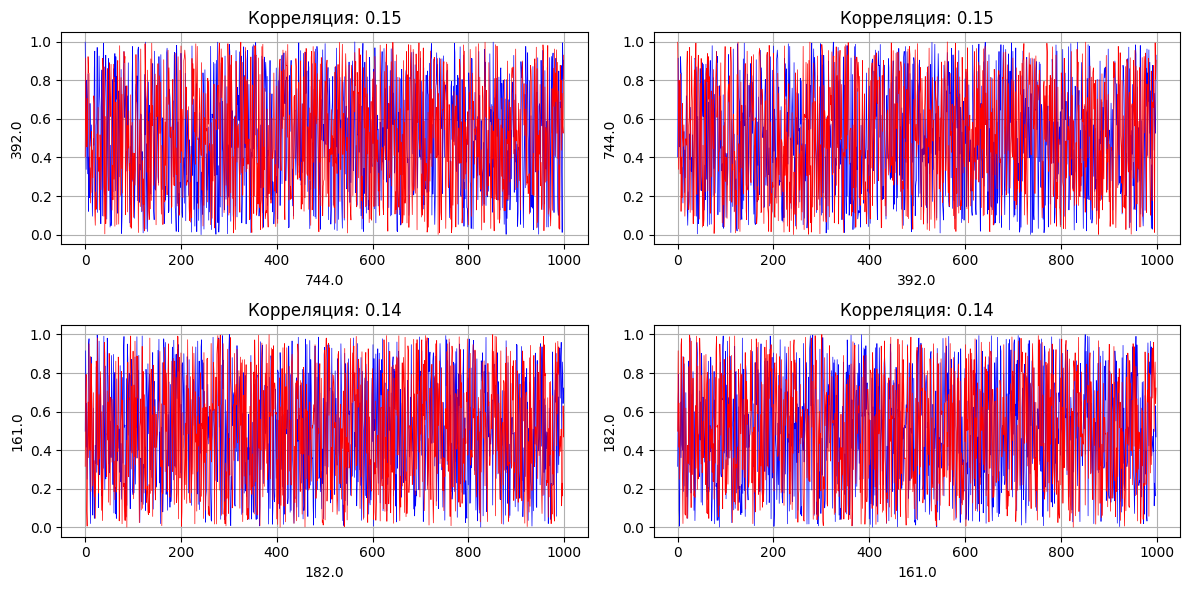

In [25]:
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red', 'purple']

i = 0
for j, (col1, col2, corr) in (top_corr_pairs.iterrows()):
    plt.subplot(2, 2, i + 1)
    plt.plot(df[col1], linestyle='-', linewidth=0.5, color=colors[0])
    plt.plot(df[col2], linestyle='-', linewidth=0.5, color=colors[2])
    plt.title(f'Корреляция: {correlation_matrix.loc[col1, col2]:.2f}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    i += 1

plt.tight_layout()
plt.show()

9. Сделайте вывод о скоррелированности этих случайных величин.

Корреляция между данными случайными значениями слишком мала (< 0.16), они никак не зависят друг от друга.

## Список литературы

- Модуль **pandas** [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/ "pandas")
- Модуль **matplotlib** [https://matplotlib.org/stable/api/pyplot_summary.html](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib")